In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("benchmarking.csv")

In [123]:
N_10000 = df[df["N"] == 10000]
N_20000 = df[df["N"] == 20000]
N_50000 = df[df["N"] == 50000]

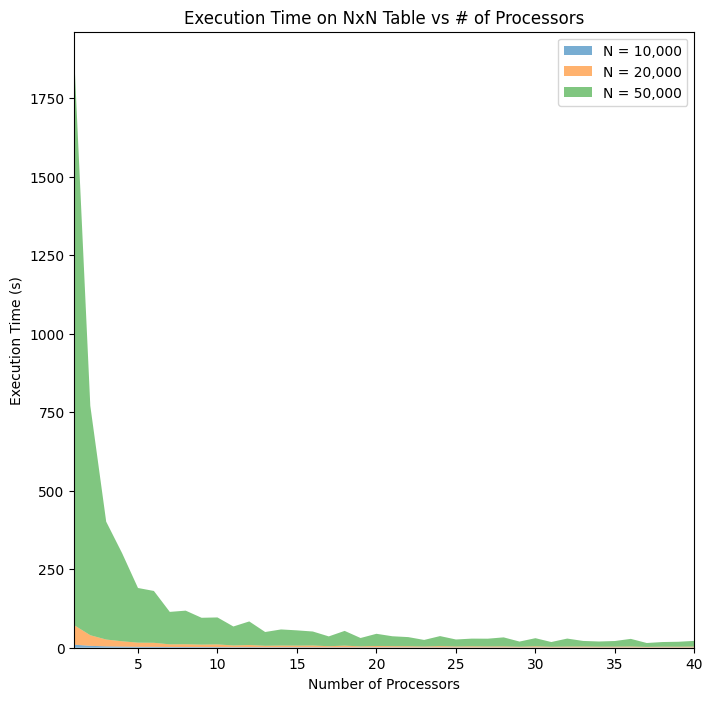

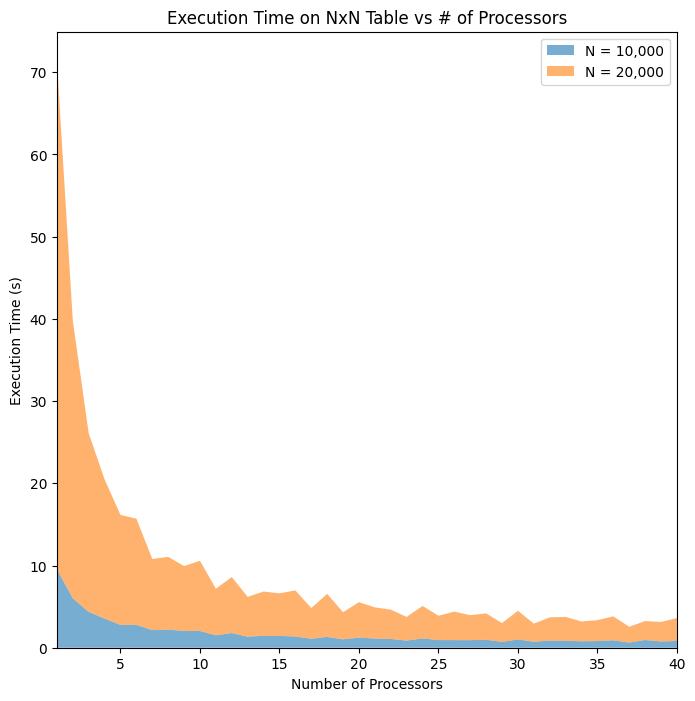

In [152]:
fig, ax = plt.subplots(figsize=(8,8))

# Stack plot of execution time speed up on different sized multiplication tables
ax.stackplot(N_10000["procs"],
             N_10000["execution_time"],
             N_20000["execution_time"], 
             N_50000["execution_time"],
             alpha= 0.6, 
             labels=["N = 10,000", "N = 20,000", "N = 50,000"])

plt.legend()

# 1 -> 40 procs
plt.xlim(left = 1, right=40)

plt.title("Execution Time on NxN Table vs # of Processors")
ax.set_xlabel("Number of Processors")
ax.set_ylabel("Execution Time (s)")

plt.show()

#Plot without N = 50,000
fig, ax = plt.subplots(figsize=(8,8))

ax.stackplot(N_10000["procs"],
             N_10000["execution_time"],
             N_20000["execution_time"], 
             alpha= 0.6, 
             labels=["N = 10,000", "N = 20,000"])

plt.legend()

# 1 -> 40 procs
plt.xlim(left = 1, right=40)

plt.title("Execution Time on NxN Table vs # of Processors")
ax.set_xlabel("Number of Processors")
ax.set_ylabel("Execution Time (s)")

plt.show()

In [130]:
N_arr = [10000, 20000, 50000]
speed_up_arr = []
for N in N_arr: 
    p1_time = df[(df["procs"] == 1) & (df["N"] == N)]["execution_time"].iloc[0]
    p2_time = df[(df["procs"] == 40) & (df["N"] == N)]["execution_time"].iloc[0]
    
    speed_up = (p1_time/p2_time)-1
    speed_up_arr.append(speed_up*100)
    
    print(f"{N}x{N} Multiplication Table")
    print(f"-"*33)
    print(f"p = 1 -> {p1_time} s")
    print(f"p = 40 -> {p2_time} s")
    print(f"{speed_up*100:.2f}% speed up\n")
    

10000x10000 Multiplication Table
---------------------------------
p = 1 -> 9.563765 s
p = 40 -> 0.826363 s
1057.33% speed up

20000x20000 Multiplication Table
---------------------------------
p = 1 -> 61.794449 s
p = 40 -> 2.78198 s
2121.24% speed up

50000x50000 Multiplication Table
---------------------------------
p = 1 -> 1796.431153 s
p = 40 -> 18.169789 s
9786.91% speed up



Text(0, 0.5, 'Speed up (%)')

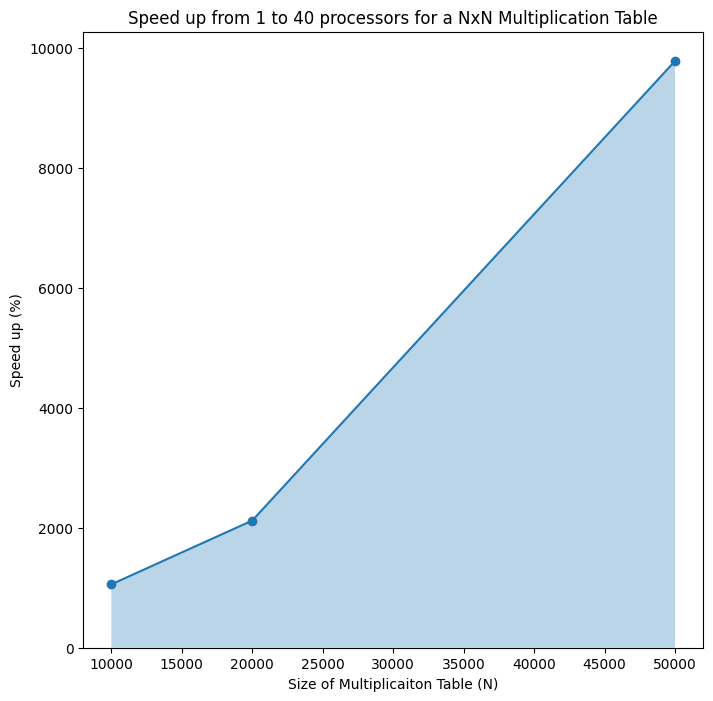

In [156]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(N_arr, speed_up_arr, marker="o")
ax.fill_between(N_arr, speed_up_arr, alpha=0.3)
plt.ylim(0)

plt.title("Speed up from 1 to 40 processors for a NxN Multiplication Table")
ax.set_xlabel("Size of Multiplicaiton Table (N)")
ax.set_ylabel("Speed up (%)")